## Import ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csvdata = pd.read_csv(r"C:\Users\Administrator\Desktop\python\League_of_Legends_Champion_Stats_13.13.csv")
df = pd.DataFrame(csvdata)

## Check ##

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    247 non-null    object 
 1   Class   247 non-null    object 
 2   Role    247 non-null    object 
 3   Tier    247 non-null    object 
 4   Score   247 non-null    float64
 5   Trend   247 non-null    float64
 6   Win%    247 non-null    float64
 7   Role%   247 non-null    float64
 8   Pick%   247 non-null    float64
 9   Ban%    247 non-null    float64
 10  KDA     247 non-null    float64
dtypes: float64(7), object(4)
memory usage: 21.4+ KB


In [4]:
print(df.head(20))

            Name     Class     Role Tier  Score  Trend   Win%  Role%  Pick%  \
0         Aatrox   Fighter      TOP  God  71.25  -3.39  48.84  92.28   7.01   
1           Ahri      Mage      MID  God  77.12  -5.03  50.90  95.23  10.63   
2          Akali  Assassin      MID    A  55.37  -5.08  48.18  78.45   5.99   
3          Akali  Assassin      TOP    C  36.35  -0.60  48.50  20.39   1.45   
4         Akshan  Marksman      MID    B  47.25  -1.50  50.15  69.32   2.88   
5         Akshan  Marksman      TOP    C  37.24   0.83  50.87  22.48   0.96   
6        Alistar      Tank  SUPPORT    A  54.33   4.60  51.13  95.57   4.58   
7          Amumu      Tank   JUNGLE    B  44.96  -0.85  51.16  66.72   2.86   
8          Amumu      Tank  SUPPORT    B  40.10  -1.92  51.50  31.76   1.10   
9         Anivia      Mage      MID    A  50.85  -1.84  51.67  79.48   2.22   
10        Anivia      Mage  SUPPORT    D  24.49  -5.76  44.86  12.07   0.29   
11         Annie      Mage      MID    A  48.73  -8.

In [5]:
#kiểm tra và xác định các ô trong DataFrame có giá trị null hay không
df.isnull()

,Name,Class,Role,Tier,Score,Trend,Win%,Role%,Pick%,Ban%,KDA
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
242,False,False,False,False,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,False,False,False,False
244,False,False,False,False,False,False,False,False,False,False,False
245,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#kiểm tra xem có giá trị thiếu (NaN) nào trong DataFrame 
print(df.isna().any())

Name     False
Class    False
Role     False
Tier     False
Score    False
Trend    False
Win%     False
Role%    False
Pick%    False
Ban%     False
KDA      False
dtype: bool


In [7]:
#đếm số lượng giá trị thiếu (NaN) trong mỗi cột của DataFrame
print(df.isna().sum())

Name     0
Class    0
Role     0
Tier     0
Score    0
Trend    0
Win%     0
Role%    0
Pick%    0
Ban%     0
KDA      0
dtype: int64


## Column chart ##

### pick% ###

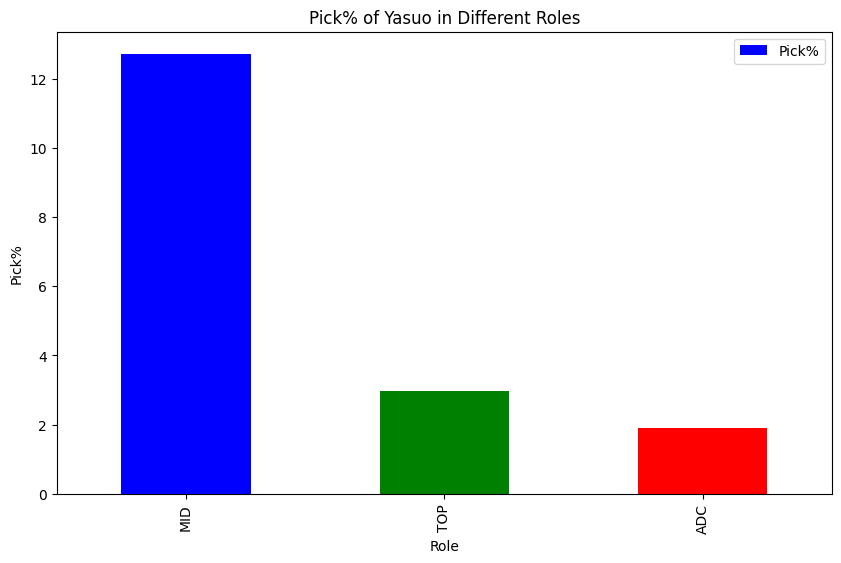

In [8]:
#Tạo một DataFrame mới chỉ chứa dữ liệu của tướng Yasuo ở các vai trò TOP, MID và ADC bằng cách lọc dữ liệu từ DataFrame gốc
yasuo_data = df[(df['Name'] == 'Yasuo') &
((df['Role'] == 'TOP') | (df['Role'] == 'MID') | (df['Role'] == 'ADC'))]

#Tạo một hình vẽ mới với kích thước được chỉ định (10x6 inch) và trả về một figure object (fig) và một axes object (ax).
fig, ax = plt.subplots(figsize=(10, 6))

#Vẽ biểu đồ cột (bar chart) cho dữ liệu trong DataFrame yasuo_data, 
#với trục x là 'Role', trục y là 'Pick%', và trên cùng một trục với ax đã được tạo trước đó.
#Các cột trong biểu đồ sẽ được tô màu xanh (TOP), xanh lá (MID) và đỏ (ADC)
yasuo_data.plot(kind='bar', x='Role', y='Pick%',
ax=ax, color=['blue', 'green' , 'red'])

#vẽ biểu đồ
plt.title('Pick% of Yasuo in Different Roles')
plt.xlabel('Role')
plt.ylabel('Pick%')
plt.show()

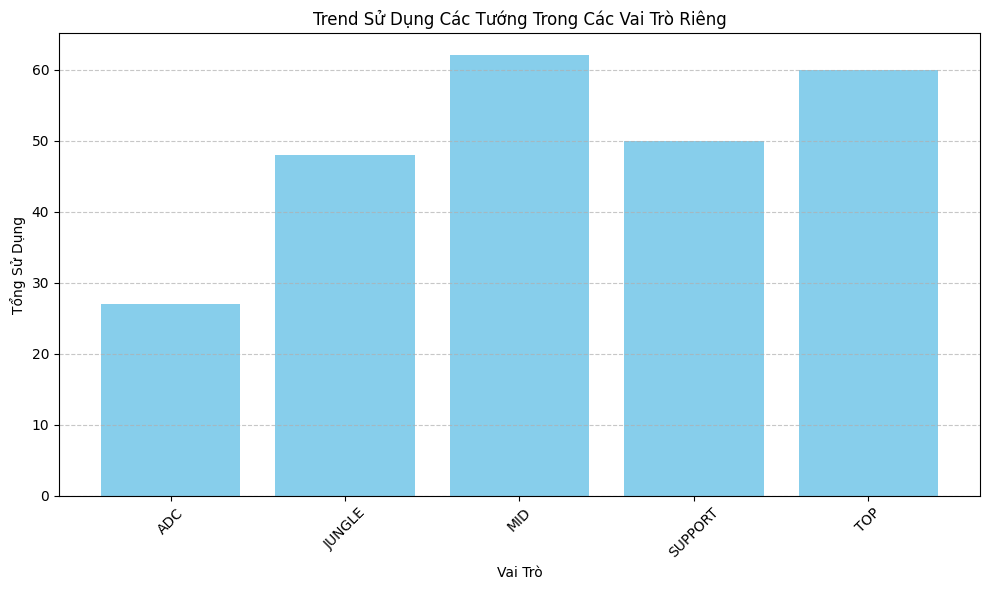

In [9]:
#tạo ra một nhóm các hàng trong DataFrame df dựa trên giá trị trong cột 'Role'.
#đếm số lượng các hàng trong mỗi nhóm.
#đặt lại chỉ số của DataFrame và cung cấp tên cho cột kết quả của phép đếm
role_usage = df.groupby(['Role']).size().reset_index(name='Total Usage')

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(role_usage['Role'], role_usage['Total Usage'], color='skyblue')
plt.title('Trend Sử Dụng Các Tướng Trong Các Vai Trò Riêng')
plt.xlabel('Vai Trò')
plt.ylabel('Tổng Sử Dụng')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

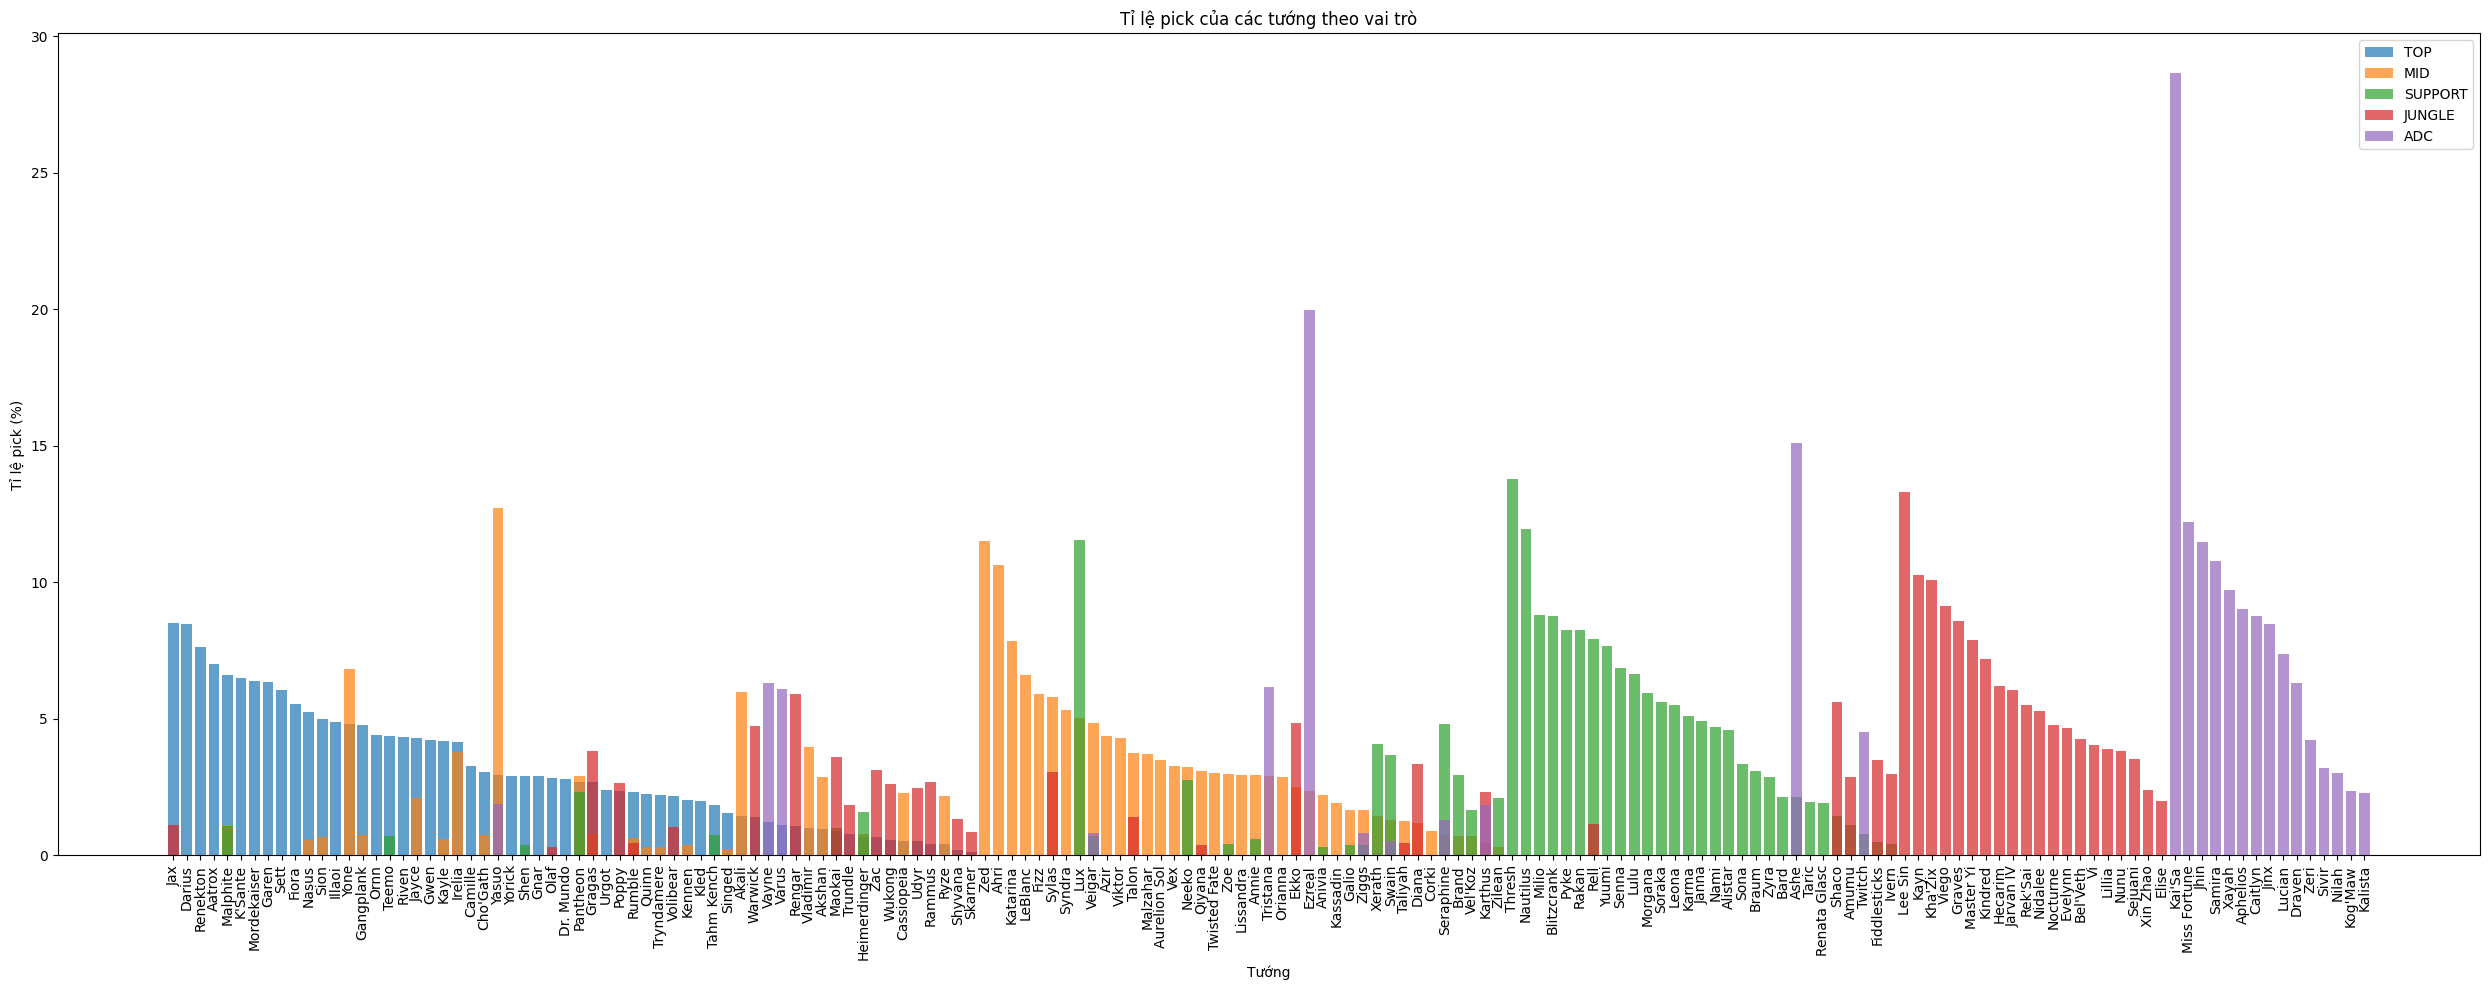

In [10]:
# Lấy danh sách các vai trò duy nhất
roles = df['Role'].unique()  

# Kích thước rộng hơn của biểu đồ
plt.figure(figsize=(25, 10))  

for role in roles:
    role_data = df[df['Role'] == role]
    # Sắp xếp theo tỉ lệ pick giảm dần
    pick_rate = role_data.groupby('Name')['Pick%'].mean().sort_values(ascending=False)  
     # Thêm cột chồng cho từng vai trò
    plt.bar(pick_rate.index, pick_rate.values, label=role, alpha=0.7) 

# Đặt tiêu đề và nhãn cho trục x, y
plt.title('Tỉ lệ pick của các tướng theo vai trò')
plt.xlabel('Tướng')
plt.ylabel('Tỉ lệ pick (%)')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.tight_layout()  # Đảm bảo không bị cắt nhãn
plt.show()

### data ###

In [11]:
yasuo_data = df[df['Name'] == 'Yasuo']

print(yasuo_data)

      Name    Class Role Tier  Score  Trend   Win%  Role%  Pick%   Ban%   KDA
228  Yasuo  Fighter  MID  God  85.15  -2.72  48.78  69.95  12.73  21.08  1.76
229  Yasuo  Fighter  TOP    B  43.76  -2.39  47.51  17.19   2.96  21.08  1.49
230  Yasuo  Fighter  ADC    B  40.10   7.72  50.87  11.31   1.89  21.08  2.01


### tạo cột Lost ###

In [12]:
df['Lost%'] = 100 - df['Win%']

check

In [13]:
print(df.head())

     Name     Class Role Tier  Score  Trend   Win%  Role%  Pick%  Ban%   KDA  \
0  Aatrox   Fighter  TOP  God  71.25  -3.39  48.84  92.28   7.01  5.81  1.85   
1    Ahri      Mage  MID  God  77.12  -5.03  50.90  95.23  10.63  6.47  2.63   
2   Akali  Assassin  MID    A  55.37  -5.08  48.18  78.45   5.99  8.10  2.30   
3   Akali  Assassin  TOP    C  36.35  -0.60  48.50  20.39   1.45  8.10  2.06   
4  Akshan  Marksman  MID    B  47.25  -1.50  50.15  69.32   2.88  5.94  2.16   

   Lost%  
0  51.16  
1  49.10  
2  51.82  
3  51.50  
4  49.85  


## Pie chart ##

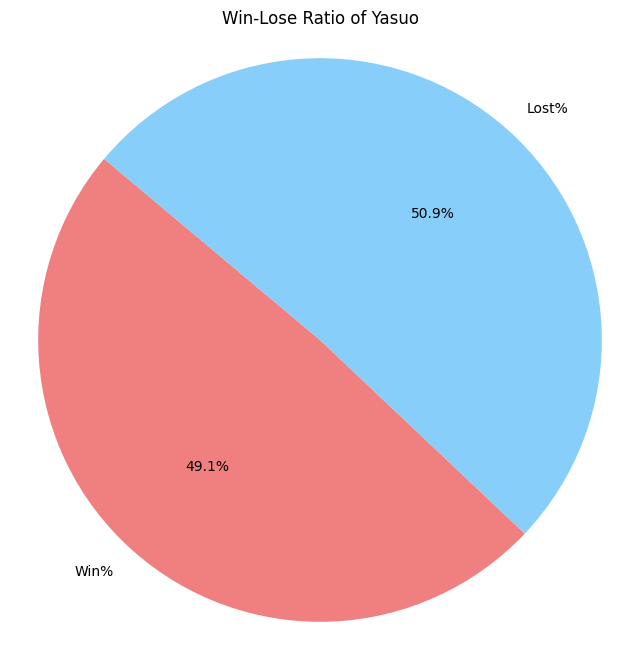

In [14]:
#Tính tỷ lệ chiến thắng trung bình của Yasuo bằng cách lấy giá trị trung bình của cột 'Win%' trong DataFrame 
win_rate = yasuo_data['Win%'].mean()
lost_rate = 100 - win_rate
labels = ['Win%', 'Lost%']
sizes = [win_rate, lost_rate]
colors = ['lightcoral', 'lightskyblue']

#vẽ biểu đồ
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Win-Lose Ratio of Yasuo')
plt.axis('equal')
plt.show()


### tỉ lệ thắng qua các vai trò ###

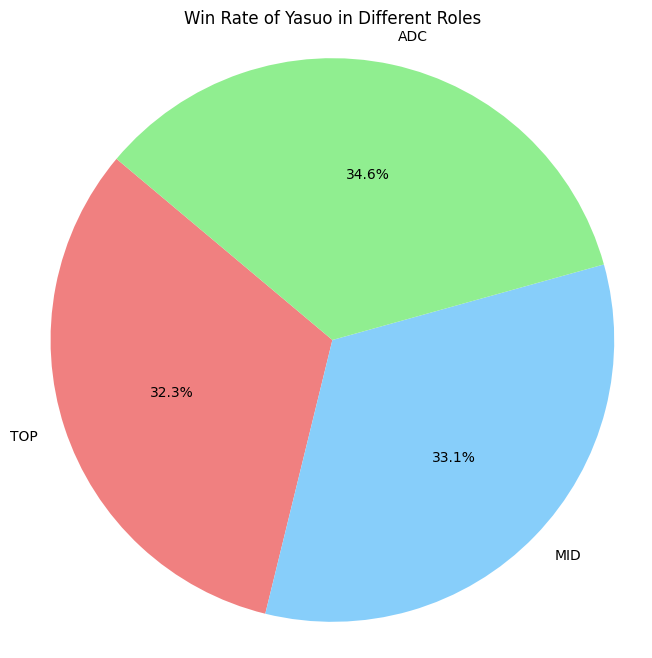

In [15]:
#Tạo một danh sách các vai trò mà Yasuo có thể đóng (TOP, MID, ADC).
yasuo_roles = ['TOP', 'MID', 'ADC']
win_rates = []
lose_rates = []

#Duyệt qua từng vai trò trong danh sách các vai trò mà Yasuo có thể đóng.
for role in yasuo_roles:
    role_data = df[(df['Name'] == 'Yasuo') & (df['Role'] == role)]
    win_rate = role_data['Win%'].mean()
    lose_rate = 100 - win_rate
    win_rates.append(win_rate)
    lose_rates.append(lose_rate)

#Tạo một danh sách các nhãn cho biểu đồ hình tròn.
labels = ['TOP', 'MID', 'ADC']
sizes = win_rates
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

#vẽ biểu đồ
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Win Rate of Yasuo in Different Roles')
plt.axis('equal')
plt.show()

### win/lost rate theo từng vai trò ###

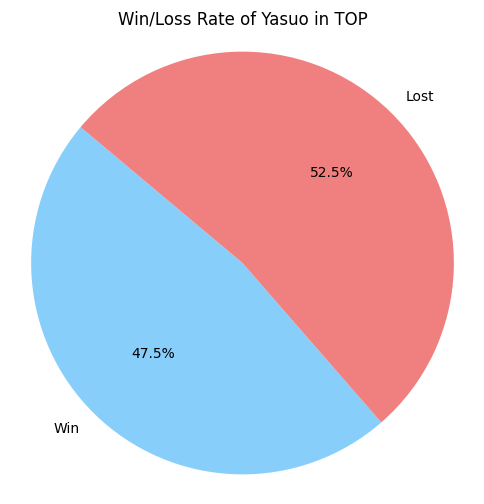

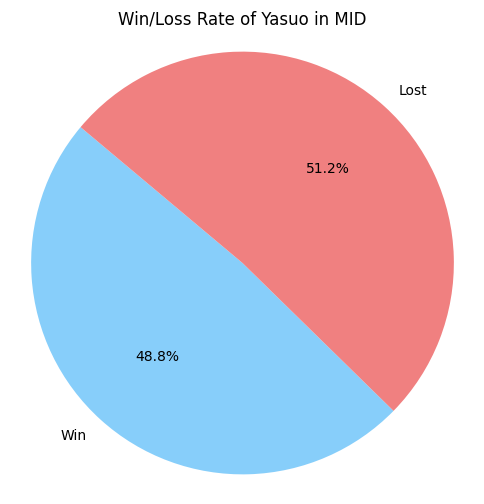

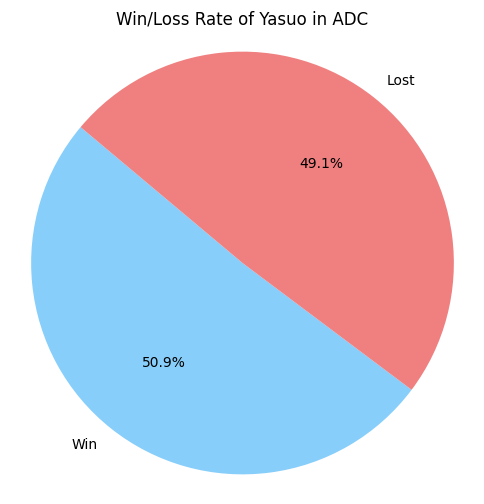

In [16]:
yasuo_roles = ['TOP', 'MID', 'ADC']

for role in yasuo_roles:
    role_data = df[(df['Name'] == 'Yasuo') & (df['Role'] == role)]
    win_rate = role_data['Win%'].mean()
    lose_rate = 100 - win_rate

    labels = ['Win', 'Lost']
    sizes = [win_rate, lose_rate]
    colors = ['lightskyblue', 'lightcoral']

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Win/Loss Rate of Yasuo in {role}')
    plt.axis('equal')
    plt.show()

## Line chart ##

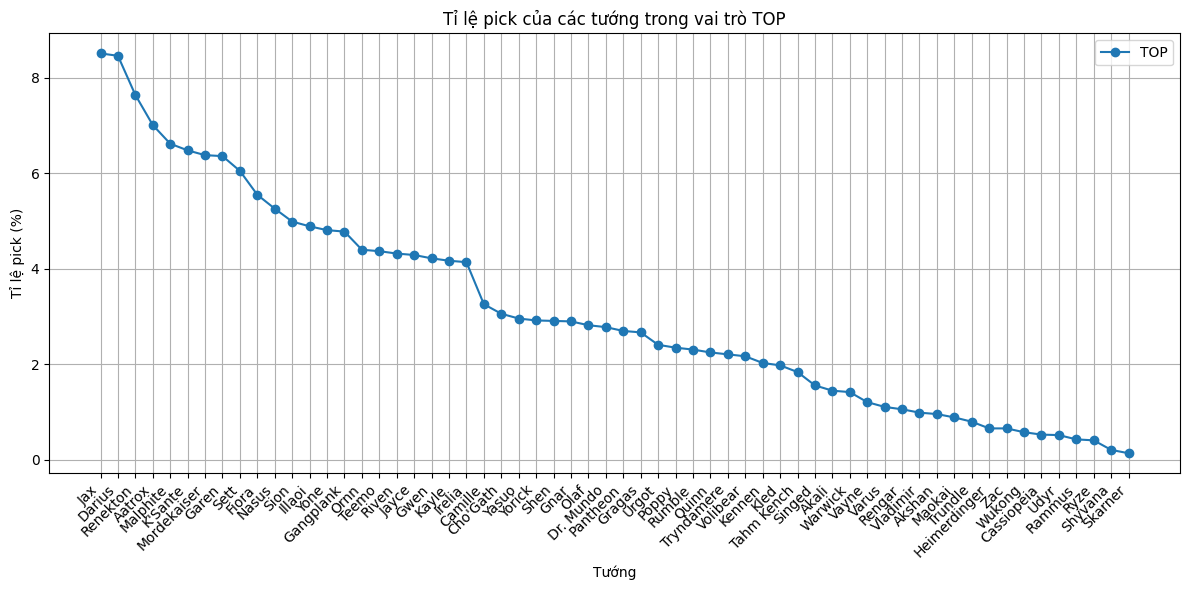

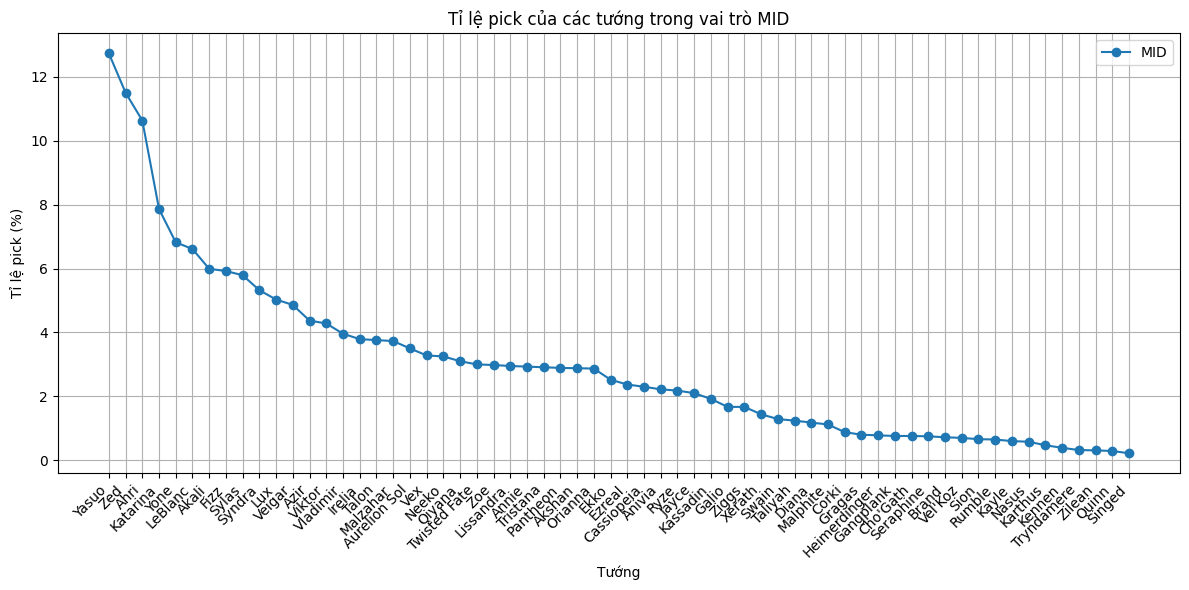

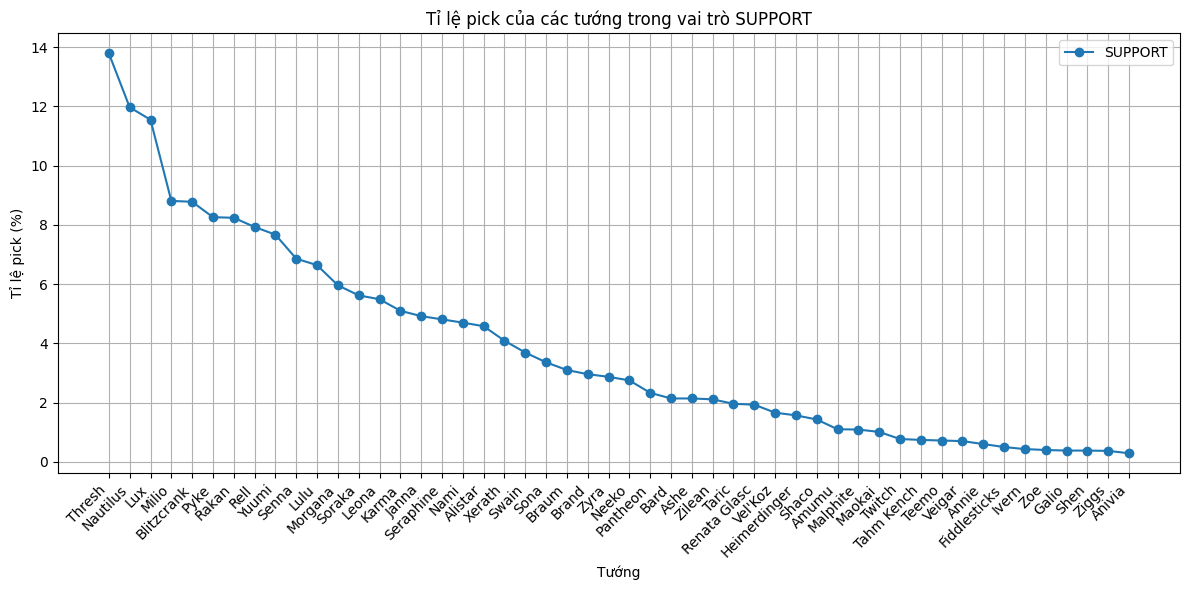

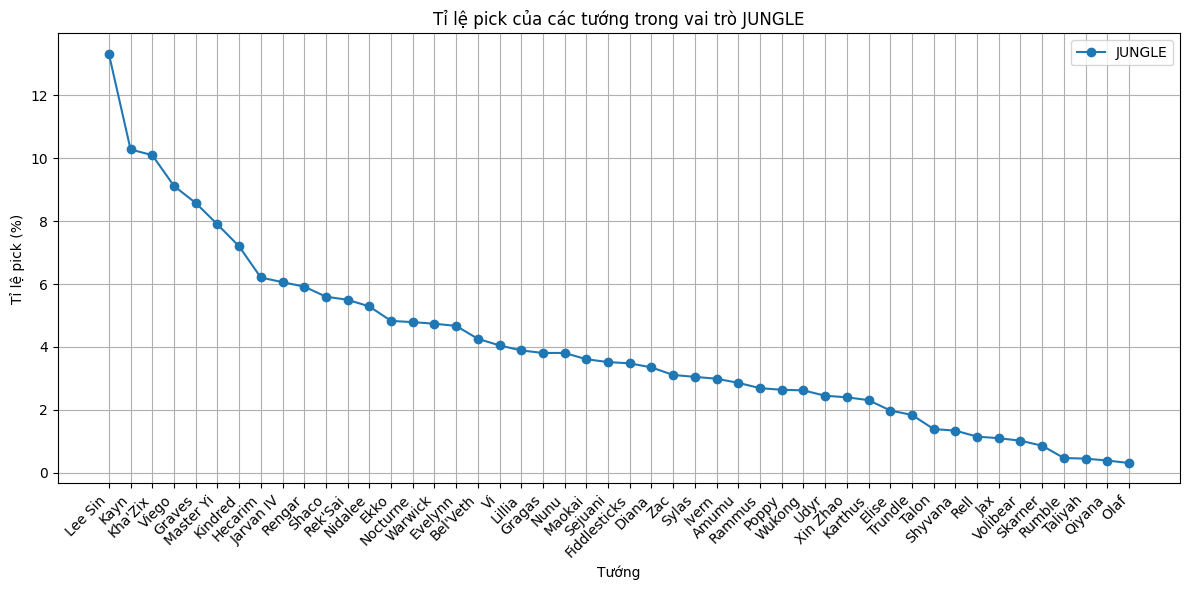

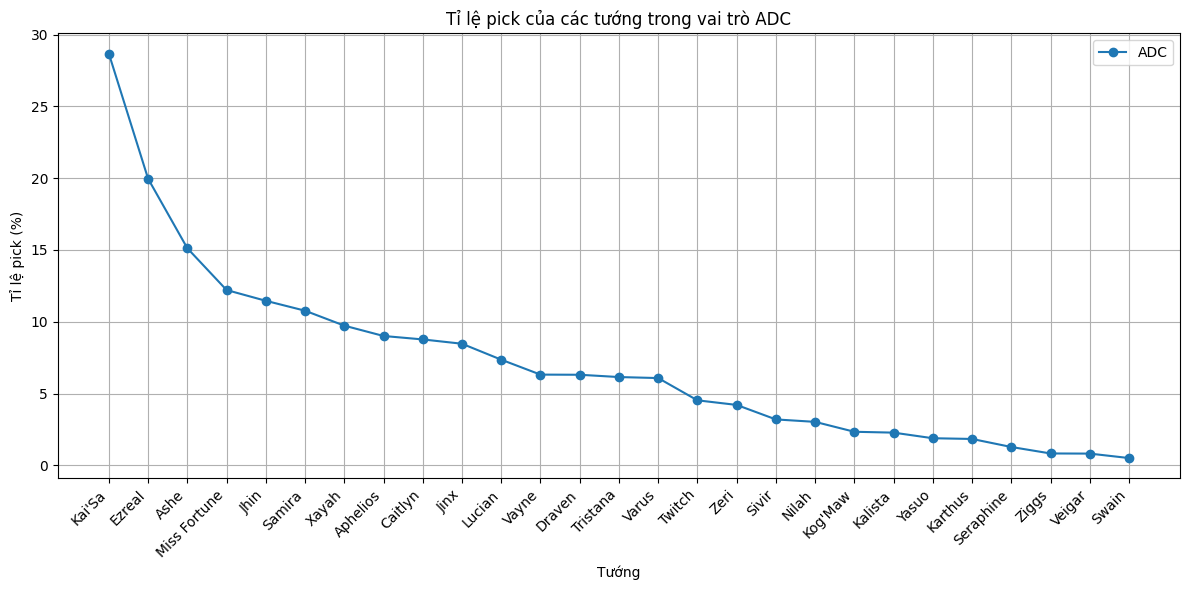

In [17]:
# Hàm để vẽ biểu đồ đường tỷ lệ pick của các tướng trong một vai trò cụ thể
def plot_pick_rates_for_role(role_df):
    
    # Sắp xếp theo tỉ lệ pick giảm dần
    role_df_sorted = role_df.sort_values(by='Pick%', ascending=False)  
    
    # Lấy tên của tất cả các tướng trong vai trò
    champions = role_df_sorted['Name']  
    
    # Lấy tỉ lệ pick của tất cả các tướng trong vai trò
    pick_rates = role_df_sorted['Pick%']  
    
    # Đặt kích thước hình
    plt.figure(figsize=(12, 6))  
    
    # Vẽ biểu đồ đường
    plt.plot(champions, pick_rates, marker='o', label=role_df['Role'].iloc[0])  
    plt.title(f'Tỉ lệ pick của các tướng trong vai trò {role_df["Role"].iloc[0]}')
    plt.xlabel('Tướng')
    plt.ylabel('Tỉ lệ pick (%)')
    
    # Xoay tên các tướng để dễ đọc
    plt.xticks(rotation=45, ha='right')  
    
    # Hiển thị chú thích về vai trò
    plt.legend(loc='upper right')  
   
    # Hiển thị lưới
    plt.grid(True)  
    
    # Đảm bảo không bị cắt bớt nội dung
    plt.tight_layout()  
    plt.show()

# Lọc và vẽ biểu đồ cho mỗi vai trò
for role in df['Role'].unique():
    role_df = df[df['Role'] == role]
    plot_pick_rates_for_role(role_df)

 Ranking 

In [18]:
unique_tiers = df['Tier'].unique()

# In ra các giá trị duy nhất trong cột "tier"
print("Các mục trong cột tier:")
for tier in unique_tiers:
    print(tier)

Các mục trong cột tier:
God
A
C
B
D
S


In [19]:
tier_order = ['God', 'S', 'A', 'B', 'C', 'D']
df['Tier'] = pd.Categorical(df['Tier'], categories=tier_order, ordered=True)

# Sắp xếp DataFrame theo cột 'Tier'
df = df.sort_values(by='Tier')

# In ra bảng xếp hạng các tướng
print(df)
#print(df.head(20))

             Name     Class     Role Tier  Score  Trend   Win%  Role%  Pick%  \
0          Aatrox   Fighter      TOP  God  71.25  -3.39  48.84  92.28   7.01   
99            Lux      Mage  SUPPORT  God  84.82   7.57  50.00  64.68  11.55   
40         Ezreal  Marksman      ADC  God  72.99 -19.84  50.10  87.80  19.96   
144      Renekton   Fighter      TOP  God  77.61  12.07  50.03  91.06   7.64   
141          Rell      Tank  SUPPORT  God  80.81  11.71  54.34  85.97   7.93   
..            ...       ...      ...  ...    ...    ...    ...    ...    ...   
134        Qiyana  Assassin   JUNGLE    D  20.78  -2.99  46.71  11.00   0.39   
65          Ivern   Support  SUPPORT    D  33.65  -4.87  48.47  11.09   0.43   
199        Twitch  Marksman  SUPPORT    D  33.25   0.76  48.49  12.59   0.77   
10         Anivia      Mage  SUPPORT    D  24.49  -5.76  44.86  12.07   0.29   
60   Heimerdinger      Mage      TOP    D  33.45  -0.59  50.64  19.31   0.66   

      Ban%   KDA  Lost%  
0     5.81  1

In [20]:
# In ra các tướng có tier là 'God'

god_tier = df[df['Tier'] == 'God']
print(god_tier)

            Name     Class     Role Tier  Score  Trend   Win%  Role%  Pick%  \
0         Aatrox   Fighter      TOP  God  71.25  -3.39  48.84  92.28   7.01   
99           Lux      Mage  SUPPORT  God  84.82   7.57  50.00  64.68  11.55   
40        Ezreal  Marksman      ADC  God  72.99 -19.84  50.10  87.80  19.96   
144     Renekton   Fighter      TOP  God  77.61  12.07  50.03  91.06   7.64   
141         Rell      Tank  SUPPORT  God  80.81  11.71  54.34  85.97   7.93   
55        Graves  Marksman   JUNGLE  God  72.71   1.85  50.77  91.21   8.58   
137        Rakan   Support  SUPPORT  God  70.91   3.70  51.57  98.95   8.24   
31        Darius   Fighter      TOP  God  89.77   2.57  49.01  92.99   8.46   
68           Jax   Fighter      TOP  God  92.58  -0.44  50.78  85.77   8.51   
75        Kai'Sa  Marksman      ADC  God  92.98   3.24  51.40  91.68  28.67   
116     Nautilus      Tank  SUPPORT  God  87.81   8.42  50.82  96.15  11.97   
20    Blitzcrank      Tank  SUPPORT  God  79.03   4.

#### column chart #### 

####  ####

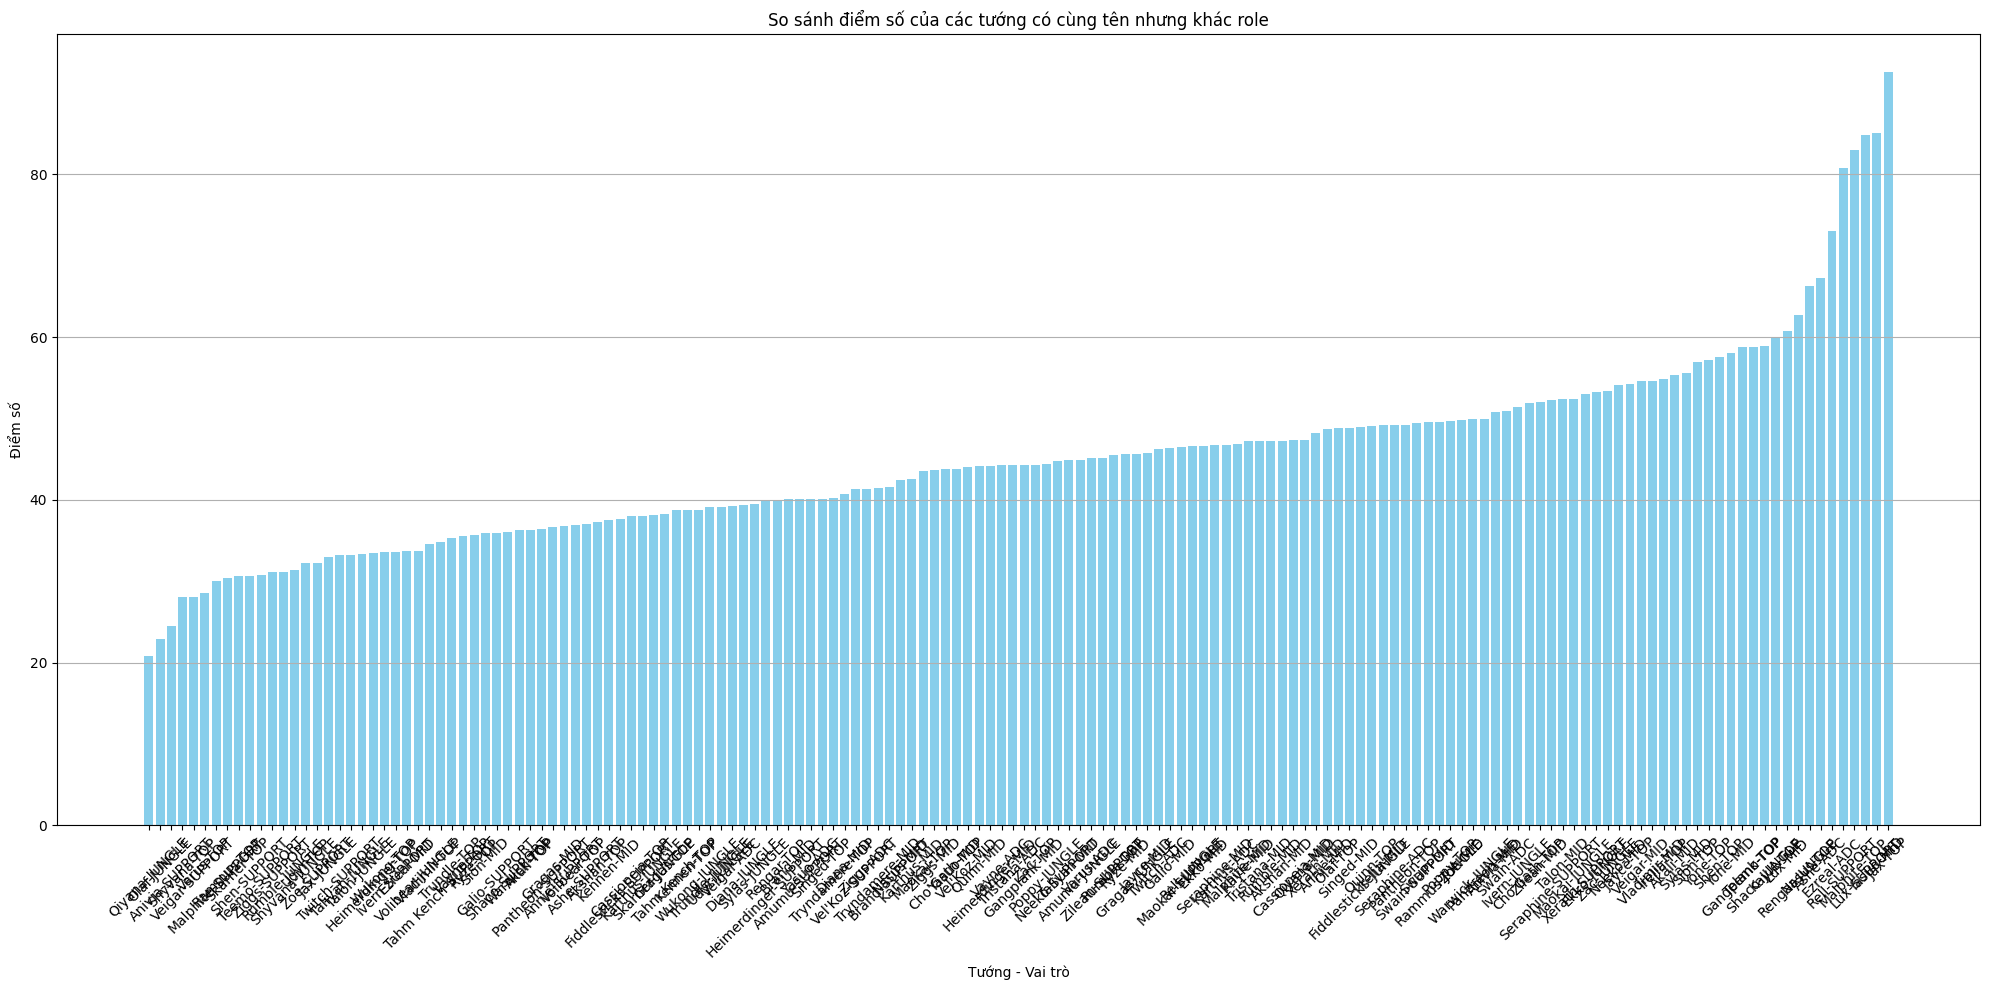

In [21]:
#Lọc ra các tướng có nhiều hơn một vai trò
df_same_name = df.groupby('Name').filter(lambda x: len(x) > 1)  
df_same_name_sorted = df_same_name.sort_values(by=['Score'])

#Tạo biểu đồ cột
#Định dạng kích thước của biểu đồ
plt.figure(figsize=(20, 10))  
plt.bar(df_same_name_sorted['Name'] + '-' + df_same_name_sorted['Role'], df_same_name_sorted['Score'], color='skyblue')
plt.title('So sánh điểm số của các tướng có cùng tên nhưng khác role')
plt.xlabel('Tướng - Vai trò')
plt.ylabel('Điểm số')

#Xoay nhãn của trục x để tránh chồng chéo
plt.xticks(rotation=45)  

#Hiển thị lưới trên trục y
plt.grid(axis='y')  

#Đảm bảo không bị cắt lớp nhãn
plt.tight_layout()  
plt.show()
    



In [22]:
# Tìm chỉ mục của tướng có điểm số cao nhất và thấp nhất
index_of_max_score = df['Score'].idxmax()
index_of_min_score = df['Score'].idxmin()

# Lấy điểm số của tướng có điểm số cao nhất và thấp nhất
tuong_cao_nhat = df.loc[index_of_max_score, ['Name', 'Role', 'Score']]
tuong_thap_nhat = df.loc[index_of_min_score, ['Name', 'Role', 'Score']]

print("Tướng có điểm số cao nhất:")
print(tuong_cao_nhat)
print("Tướng có điểm số thấp nhất:")
print(tuong_thap_nhat)

Tướng có điểm số cao nhất:
Name     Kai'Sa
Role        ADC
Score     92.98
Name: 75, dtype: object
Tướng có điểm số thấp nhất:
Name     Qiyana
Role     JUNGLE
Score     20.78
Name: 134, dtype: object


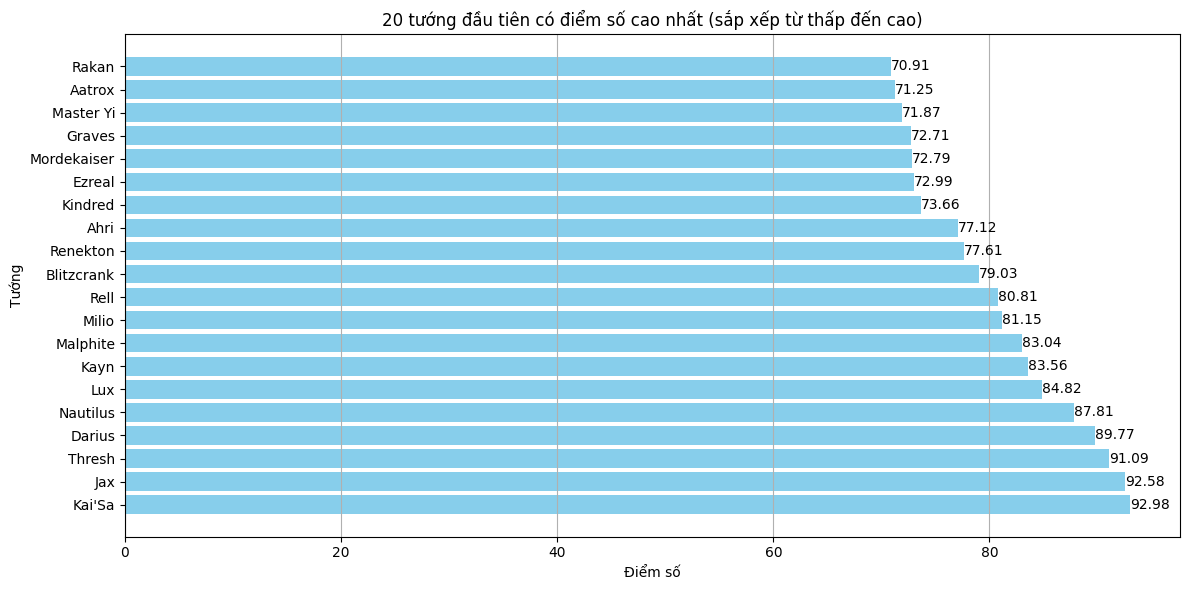

In [23]:
top_20_tuong = df.head(20).sort_values(by='Score')

# Tạo biểu đồ cột trên trên
plt.figure(figsize=(12, 6))
bars = plt.barh(top_20_tuong['Name'], top_20_tuong['Score'], color='skyblue')
plt.xlabel('Điểm số')
plt.ylabel('Tướng')
plt.title('20 tướng đầu tiên có điểm số cao nhất (sắp xếp từ thấp đến cao)')

# Hiển thị số điểm trên mỗi cột
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}', ha='left', va='center')

# Đảo ngược trục y để tên tướng ở phía trên
plt.gca().invert_yaxis()  

# Hiển thị lưới trên trục x
plt.grid(axis='x') 

# Đảm bảo không bị cắt lớp nhãn
plt.tight_layout()  
plt.show()